# Day 3 - مفاهیم پیشرفته‌تر مدل‌سازی
هدف امروز:
-  یادگیری مدل‌های درخت تصمیم (Decision Tree) و جنگل تصادفی (Random Forest)

### 1. مدل Decision Tree (درخت تصمیم)

یک مدل قدرتمند و قابل درک برای انسان:
- ساختار درختی داره (سوال-جواب-انشعاب)
- می‌تونه هم Regression باشه هم Classification
- خطر: Overfitting (خیلی زیاد یاد می‌گیره، ولی روی داده جدید خراب می‌شه)

In [2]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# بارگذاری داده‌ها
data = fetch_california_housing()
X = data.data
y = data.target


# تقسیم به داده‌های آموزشی و تست
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ساخت مدل
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# پیش‌بینی
y_pred_tree = tree_model.predict(X_test)

# محاسبه خطا
mse_tree = mean_squared_error(y_test, y_pred_tree)
print(f"Decision Tree MSE: {mse_tree:.2f}")


Decision Tree MSE: 0.50


### 2. مدل Random Forest (جنگل تصادفی)

تعدادی درخت تصمیم داریم که با هم رأی‌گیری می‌کنن. مزیت:
- معمولا دقیق‌تر از درخت تنها
- کمتر Overfit می‌شه

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# بارگذاری داده‌ها
data = fetch_california_housing()
X = data.data
y = data.target


# تقسیم به داده‌های آموزشی و تست
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ساخت مدل
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)

# پیش‌بینی
y_pred_forest = forest_model.predict(X_test)

# خطا
mse_forest = mean_squared_error(y_test, y_pred_forest)
print(f"Random Forest MSE: {mse_forest:.2f}")


Random Forest MSE: 0.26


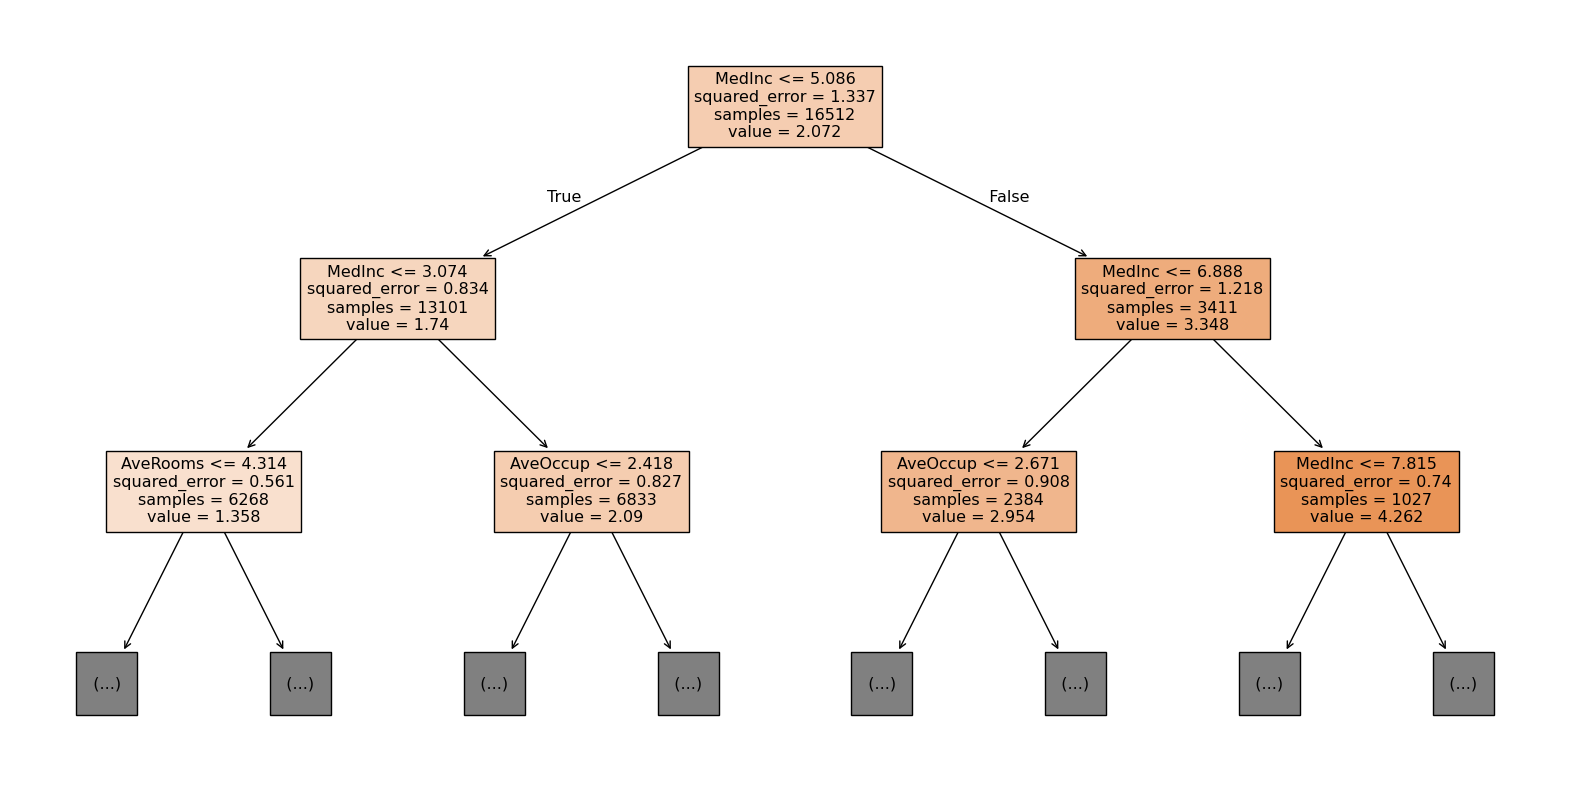

In [7]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# لود کردن داده برای گرفتن feature names
data = fetch_california_housing()

plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=data.feature_names, filled=True, max_depth=2)
plt.show()

### ساخت Pipeline برای مدل Linear Regression

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# بارگذاری داده‌ها
data = fetch_california_housing()
X = data.data
y = data.target


# تقسیم به داده‌های آموزشی و تست
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ساخت Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),       # نرمال‌سازی ویژگی‌ها
    ('regressor', LinearRegression())   # مدل رگرسیون
])

# آموزش Pipeline
pipeline.fit(X_train, y_train)

# پیش‌بینی
y_pred_pipe = pipeline.predict(X_test)

# ارزیابی
from sklearn.metrics import mean_squared_error
mse_pipe = mean_squared_error(y_test, y_pred_pipe)
print(f"Pipeline MSE: {mse_pipe:.2f}")


Pipeline MSE: 0.56


In [3]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [4]:
import joblib

# ذخیره کل pipeline در یک فایل
joblib.dump(pipeline, 'linear_pipeline.joblib')

['linear_pipeline.joblib']

In [ ]:
# بارگذاری pipeline ذخیره‌شده
loaded_pipeline = joblib.load('linear_pipeline.joblib')

# استفاده مجدد برای پیش‌بینی
y_pred_loaded = loaded_pipeline.predict(X_test)

# بررسی صحت عملکرد
from sklearn.metrics import mean_squared_error
mse_loaded = mean_squared_error(y_test, y_pred_loaded)
print(f"Loaded pipeline MSE: {mse_loaded:.2f}")

Loaded pipeline MSE: 0.56


### ساخت اپ ساده با Streamlit

In [ ]:
pip install streamlit


In [ ]:
import streamlit as st
import joblib
import numpy as np

# بارگذاری مدل
pipeline = joblib.load('linear_pipeline.joblib')

# عنوان
st.title("پیش‌بینی قیمت خانه در California")

# گرفتن ورودی از کاربر
MedInc = st.slider('میانگین درآمد خانوار (x10,000$)', 0.0, 15.0, 3.5)
HouseAge = st.slider('سن خانه', 1, 50, 20)
AveRooms = st.slider('میانگین تعداد اتاق', 1.0, 10.0, 5.0)
AveBedrms = st.slider('میانگین تعداد اتاق خواب', 0.5, 5.0, 1.0)
Population = st.slider('جمعیت منطقه', 100, 35000, 1000)
AveOccup = st.slider('میانگین افراد هر خانه', 0.5, 10.0, 3.0)
Latitude = st.slider('عرض جغرافیایی', 32.0, 42.0, 34.0)
Longitude = st.slider('طول جغرافیایی', -125.0, -114.0, -120.0)

# ساخت آرایه ورودی
input_data = np.array([[MedInc, HouseAge, AveRooms, AveBedrms,
                        Population, AveOccup, Latitude, Longitude]])

# پیش‌بینی و نمایش نتیجه
if st.button('پیش‌بینی کن'):
    prediction = pipeline.predict(input_data)
    st.success(f'🏠 قیمت پیش‌بینی‌شده خانه: {prediction[0]:.2f} x 100,000 $')


Save this code in streamlit/app.py and run:
```
streamlit run streamlit/app.py
```

### مدل در یادگیری ماشین یعنی چی؟
مدل (Model) یک تابع ریاضی هست که یاد می‌گیره بین «ویژگی‌های ورودی» و «نتیجه‌ی خروجی» یک رابطه پیدا کنه.

مدل = تابع + پارامترها
```
def model(X):
    return f(X)  # که f رو باید با یادگیری پیدا کنیم
```

### مدل برای الگوریتم خطی:
y=w∗x+b
بعد از یادگیری:
```
def model(x):
    return 0.8 * x + 2.3
```
### مدل برای الگوریتم غیر خطی درخت تصمیم
بعد از یادگیری:
```
if income > 50K:
    if age < 30:
        return 400K
    else:
        return 300K
else:
    return 150K
```

### مدل‌های سنگین مثل شبکه‌های عصبی (Neural Networks)
y=f3​(f2​(f1​(x)))
```
def model(x):
    z1 = relu(W1 @ x + b1)
    z2 = relu(W2 @ z1 + b2)
    return W3 @ z2 + b3
```
مدل یعنی همه‌ی اون پارامترهایی که تو W و b ذخیره شدن.


| سوال | جواب |
|------|------|
| مدل چیه؟ | یه تابع ریاضی که یاد گرفته شده |
| چی رو یاد می‌گیره؟ | پارامترهای اون تابع |
| الگوریتم چیه؟ | روشی برای آموزش دادن مدل با داده‌ها |
| مدل بعد از آموزش چیه؟ | یه شیء (object) که وقتی ورودی بدی، خروجی می‌ده |
| چطور مدل رو ذخیره می‌کنیم؟ | با ابزارهایی مثل `joblib` یا `pickle` |

تو حافظه، مدل واقعاً یک کلاس پایتون هست که:
- داخلش پارامترها (مثل وزن‌ها) ذخیره‌ان
- یه متد .predict() داره که همون تابع یادگرفته‌شده رو اجرا می‌کنه